# Project Name: T-shirt size classification using KNN

## Data Source

https://www.listendata.com/2017/12/k-nearest-neighbor-step-by-step-tutorial.html

## Problem Statement:

You own an online clothing business and you would like to develop a new app (or in-store) feature in which customers would enter their own height and weight and the system would predict what T-shirt size should they wear. Features are height and weight and output is either L (Large) or S (Small). 

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset

In [2]:
data = pd.read_csv("Tshirt_Sizing_Dataset.csv")

In [3]:
data.head(100)

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,S
1,158,59,S
2,158,63,S
3,160,59,S
4,160,60,S
5,163,60,S
6,163,61,S
7,160,64,L
8,163,64,L
9,165,61,L


In [4]:
data.tail()

,Height (in cms),Weight (in kgs),T Shirt Size
13,168,63,L
14,168,66,L
15,170,63,L
16,170,64,L
17,170,68,L


## Creating Train and Test Dataset

In [5]:
X=data.drop("T Shirt Size",axis=1)
X

,Height (in cms),Weight (in kgs)
0,158,58
1,158,59
2,158,63
3,160,59
4,160,60
5,163,60
6,163,61
7,160,64
8,163,64
9,165,61


In [6]:
y=pd.get_dummies(data["T Shirt Size"],drop_first=True)
y

,S
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,0
8,0
9,0


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=5)

## Model Training 

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn_model = KNeighborsClassifier(n_neighbors=5, p=2,
    metric='minkowski')

In [10]:
knn_model.fit(X_train,y_train)

/Applications/anaconda3/envs/chatterbot/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier()

In [11]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

## Model Testing

In [12]:
y_pred=knn_model.predict(X_test)

In [13]:
y_pred

array([1, 1, 0, 1, 0], dtype=uint8)

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
cm = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

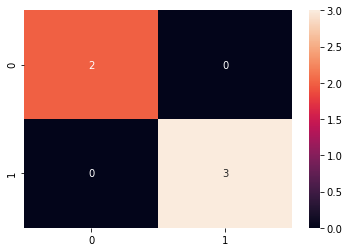

In [16]:
sns.heatmap(cm,annot = True)

## New Data

In [17]:
new_value = ([[161,61]])

In [18]:
knn_model.predict(new_value)

array([1], dtype=uint8)